# Empirical constraints: an overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *

In [2]:
dtypes={"Label":str, "rho0":np.float64, "E/aA": np.float64}
data_skyrme=pd.read_csv("data/satpoints_skyrme.csv", comment="#", dtype=dtypes)
data_skyrme["type"]="Skyrme"
data_rmf=pd.read_csv("data/satpoints_rmf.csv", comment="#", dtype=dtypes)
data_rmf["type"]="RMF"
data=pd.concat([data_skyrme,data_rmf])
data.tail()

,Label,rho0,E/A,type
0,BKA22,0.147,-15.91,RMF
1,BKA24,0.147,-15.95,RMF
2,BSR11,0.147,-16.08,RMF
3,BSR12,0.147,-16.10,RMF
4,Z271v5,0.148,-16.24,RMF


## Plot the data

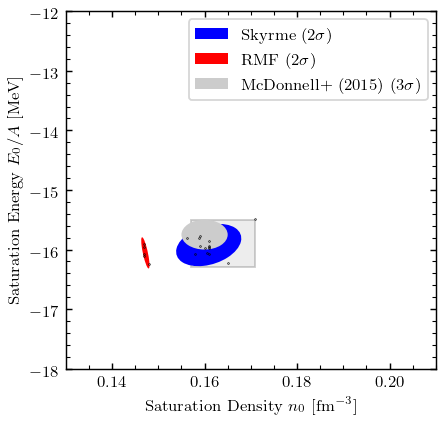

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8.6*cm, 8.2*cm), constrained_layout=True)

legend_elements=[]
for imodel,model in enumerate(("Skyrme", "RMF")):
    masked_data=data[data["type"]==model]
    color=colorset[imodel]
    confidence_ellipse(masked_data["rho0"], masked_data["E/A"], 
                       ax, n_std=2.0, facecolor=color, show_scatter=True)
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"{model} (2$\\sigma$)"))

plot_empirical_saturation(ax=ax, zorder=-3)

color=facecolor="0.8"
confidence_ellipse_mean_cov([np.mean([0.155,0.165]),np.mean([-16, -15.5])], np.diag([0.005,0.25])**2, 
                            ax=ax, n_std=1, facecolor="0.8")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"McDonnell+ (2015) (3$\\sigma$)"))
# 0.155 ≤ ρc ≤ 0.165 (fm−3 ); −16.0 ≤ E NM /A ≤ −15.5 (MeV);

ax.legend(handles=legend_elements, loc='best')

ax.set_xlim(0.13, 0.21)
ax.set_ylim(-18, -12.)
ax.set_xlabel('Saturation Density $n_0$ [fm$^{-3}$]')
ax.set_ylabel('Saturation Energy $E_0/A$ [MeV]')
fig.savefig("saturation.pdf")